<a href="https://colab.research.google.com/github/rajprasad001/deep_learning_concepts/blob/master/Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transfer Learning

Task 1 : Transfer learning on Mnist Dataset

*   Split the Mnist Dataset such that source dataset has instances of 7 class and a target dataset which has instances of 3 classes.
*   Train a model of choice on source dataset and use transfer learning to classify the target dataset.
*   Compare the results of transfer learning with a model trained completely on the target dataset on the basis of accuracy, steps untill convergence, etc.

Task 2 : Transfer learning on Fashion Mnist Dataset as done in task 1 and compare the results

Task 3 : Different ways of Transfer learning

*    Try freezing different layers and then compare the results.




## Importing Libraries

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

## Loading and Managing dataset for the task

In [28]:
# The initial task was to create subsets of dataset such that we have subset 1 with instances belonging to 7 classes and subset 2
# belonging to remaining 3 classes. For the task, instances of class 0, 1 and 2 were selected for the target domain and the rest 
# were selected as source domain. Source domain was used for initial model training.

# Loading mnist digit data
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()
# Loadiong Fashion mnist data
(X_train_fmnist, Y_train_fmnist), (X_test_fmnist, Y_test_fmnist) = tf.keras.datasets.fashion_mnist.load_data()

# Defining class for allowing class split as mentioned above
def data_split(label, instance):
  ips = [] # instance_primary_subset = ips
  lps = [] # label_primary_subset = lps
  iss = [] # instance_secondary_subset = iss
  lss = [] # label_secondary_subset = lss
  ind = []
  for idx,item in enumerate(label):
    if item == 7 or item == 8 or item == 9:
      lss.append(label[idx])
      iss.append(instance[idx])
      ind.append(idx)
  for idx,item in enumerate(label):
    if idx not in ind:
      lps.append(label[idx])
      ips.append(instance[idx])
  ips = np.asarray(ips)
  lps = np.asarray(lps)
  iss = np.asarray(iss)
  lss = np.asarray(lss)
  return (ips,lps,iss,lss)

# Both training and testing data was split into source and target domain
# Mnist digit data
x_train_prim,y_train_prim, x_train_sec,y_train_sec =  data_split(Y_train,X_train)
x_test_prim,y_test_prim,x_test_sec,y_test_sec = data_split(Y_test,X_test)

# Fashion Mnist data
x_test_prim_fmnist ,y_test_prim_fmnist ,x_test_sec_fmnist ,y_test_sec_fmnist  = data_split(Y_test_fmnist,X_test_fmnist)
x_train_prim_fmnist,y_train_prim_fmnist,x_train_sec_fmnist,y_train_sec_fmnist = data_split(Y_train_fmnist,X_train_fmnist)

print('x_train_prim :{}'.format(x_train_prim.shape))
print('y_train_prim :{}'.format(y_train_prim.shape))
print('x_train_sec  :{}'.format(x_train_sec.shape))
print('Y_train_sec  :{}'.format(y_train_sec.shape))
print('x_test_prim  :{}'.format(x_test_prim.shape))
print('y_test_prim  :{}'.format(y_test_prim.shape))
print('x_test_sec   :{}'.format(x_test_sec.shape))
print('Y_test_sec   :{}'.format(y_test_sec.shape))

# To adjust the range of the dense part of the model, the classes of the target domain are changed to class 7 = 0, class 8 = 1, 
# class 9 = 2
def ass_new_class(data):
  for idx,item in enumerate(data):
    if item == 7:
      data[idx] = 0
    elif item == 8:
      data[idx] = 1
    else:
      data[idx] = 2
  return (data)

y_train_sec = ass_new_class(y_train_sec)
y_test_sec = ass_new_class(y_test_sec)

y_train_sec_fmnist = ass_new_class(y_train_sec)
y_test_sec_fmnist = ass_new_class(y_test_sec)

x_train_prim :(41935, 28, 28)
y_train_prim :(41935,)
x_train_sec  :(18065, 28, 28)
Y_train_sec  :(18065,)
x_test_prim  :(6989, 28, 28)
y_test_prim  :(6989,)
x_test_sec   :(3011, 28, 28)
Y_test_sec   :(3011,)


In [31]:
y_train_sec_fmnist.shape

(18065,)

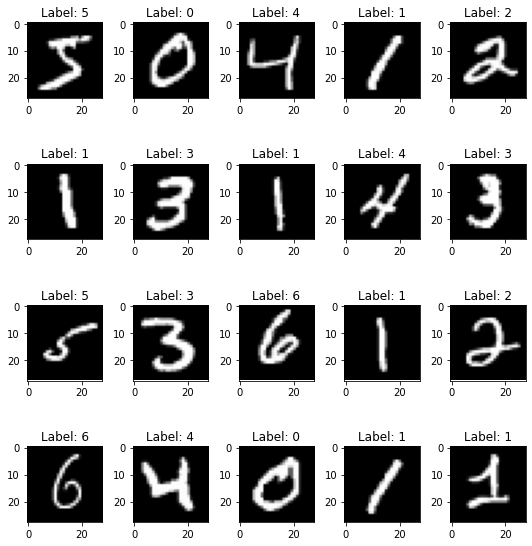

In [21]:
# Verifying the split visually and comparing the corresponding labels for the images.
num = 20
images = x_train_prim[:num]
labels = y_train_prim[:num]

num_row = 4
num_col = 5
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

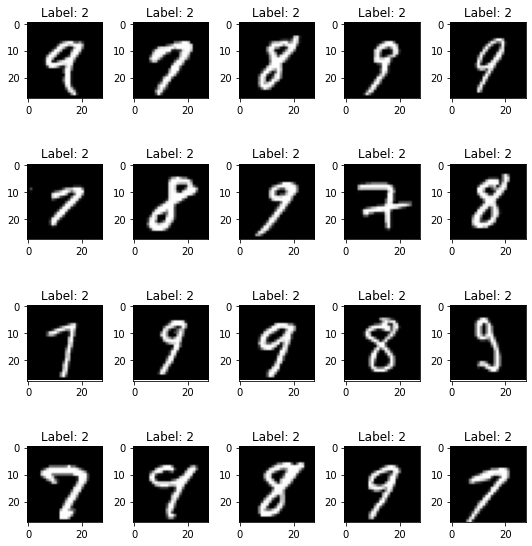

In [22]:
num = 20
images = x_train_sec[:num]
labels = y_train_sec[:num]

num_row = 4
num_col = 5
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [23]:
# The instances needs to be reshaped and standardized. The pixel value of each instance is in the range of (0, 255). To standardize the 
# values(transforming the values between 0 and 1), each pixel was standardized by 255.) 
#x_train_prim = x_train_prim.reshape(-1,28,28,1).astype("float32")/255
#x_train_sec = x_train_sec.reshape(-1,28,28,1).astype("float32")/255
#x_test_prim = x_test_prim.reshape(-1,28,28,1).astype("float32")/255
#x_test_sec = x_test_sec.reshape(-1,28,28,1).astype("float32")/255
x_train_prim = x_train_prim/255
x_train_sec = x_train_sec/255
x_test_prim = x_test_prim/255
x_test_sec = x_test_sec/255
x_train_prim_fmnist = x_train_prim_fmnist/255
x_train_sec_fmnist = x_train_sec_fmnist/255
x_test_prim_fmnist = x_test_prim_fmnist/255
x_test_sec_fmnist = x_test_sec_fmnist/255

## Defining the Densenet model

In [24]:
# For the task of training, inception net was Densenet was used as the base model. 

def densenet(d,opt,train_x,train_y,epo,val_x,val_y):
  inputs = tf.keras.layers.Input((28,28,1))
  #initial convolution layer before the denseblock
  den0 = tf.keras.layers.Conv2D(16,3,padding='SAME',activation='relu')(inputs)
  den1 = tf.keras.layers.BatchNormalization()(den0)
  den2 = tf.keras.layers.Activation('relu')(den1)

  # Block 1
  #Each block consists of 4 convolution layers. The output of each layer is passed on to all the following layers as an input.
  den3 = tf.keras.layers.Conv2D(6,3,padding='SAME',activation='relu')(den2) # block1-Layer1: shape = 28 x 28 x 6
  den4 = tf.keras.layers.concatenate([den2,den3])# block 1- concatenation of input(den2) and layer1(den3): shape = 28 x 28 x 22
  den5 = tf.keras.layers.Conv2D(6,3,padding='SAME',activation='relu')(den4) # block1-Layer2: shape = 28 x 28 x 6
  den6 = tf.keras.layers.concatenate([den4,den5]) # block 1- concatenation of input(den2), layer1(den3) and layer2(den5): shape = 28 x 28 x 28 
  den7 = tf.keras.layers.Conv2D(6,3,padding='SAME',activation='relu')(den6) # block1-Layer3: shape = 28 x 28 x 6
  den8 = tf.keras.layers.concatenate([den6,den7]) # block 1- concatenation of input(den2), layer1(den3),layer2(den5) and layer3(den7): shape = 28 x 28 x 34
  den9 = tf.keras.layers.Conv2D(6,3,padding='SAME',activation='relu')(den8) # block1-Layer4: shape = 28 x 28 x 6
  den10 = tf.keras.layers.concatenate([den8,den9]) # block 1- concatenation of input(den2), layer1(den3),layer2(den5),layer3(den7) and layer4(den9): shape = 28 x 28 x 40

  #transition layer 1
  den11 = tf.keras.layers.Conv2D(1,3,padding='SAME',activation='relu')(den10) # shape = 28 x 28 x 1
  den12 = tf.keras.layers.AvgPool2D(2,strides=2)(den11)# shape = 14x14x1

  #Block2
  den13 = tf.keras.layers.Conv2D(12,3,padding='SAME',activation='relu')(den12)
  den14 = tf.keras.layers.concatenate([den12,den13])
  den15 = tf.keras.layers.Conv2D(12,3,padding='SAME',activation='relu')(den14)
  den16 = tf.keras.layers.concatenate([den14,den15]) 
  den17 = tf.keras.layers.Conv2D(12,3,padding='SAME',activation='relu')(den16)
  den18 = tf.keras.layers.concatenate([den16,den17])
  den19 = tf.keras.layers.Conv2D(12,3,padding='SAME',activation='relu')(den18)
  den20 = tf.keras.layers.concatenate([den18,den19])
  
  #transition layer 2
  den21 = tf.keras.layers.Conv2D(1,3,padding='SAME',activation='relu')(den20) # shape = 32 x 32 x 1
  den22 = tf.keras.layers.AvgPool2D(2,strides=2)(den21)# shape = 6x6x1
  
  #Block3
  den23 = tf.keras.layers.Conv2D(24,3,padding='SAME',activation='relu')(den22)
  den24 = tf.keras.layers.concatenate([den22,den23])
  den25 = tf.keras.layers.Conv2D(24,3,padding='SAME',activation='relu')(den24)
  den26 = tf.keras.layers.concatenate([den24,den25]) 
  den27 = tf.keras.layers.Conv2D(24,3,padding='SAME',activation='relu')(den26)
  den28 = tf.keras.layers.concatenate([den26,den27])
  den29 = tf.keras.layers.Conv2D(24,3,padding='SAME',activation='relu')(den28)
  den30 = tf.keras.layers.concatenate([den28,den29])

  #classifictaion layer
  den31 = tf.keras.layers.AvgPool2D(2,strides=2)(den30)
  den32 = tf.keras.layers.Flatten()(den31)
  output = tf.keras.layers.Dense(d,activation='softmax')(den32)
  
  model = tf.keras.Model(inputs,output)
  model.summary()

  model.compile(optimizer=opt,loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
  history = model.fit(train_x, train_y, epochs=epo, validation_data=(val_x, val_y))
  
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.ylim([0, 1])
  plt.legend(loc='lower right')
  return model

  #test_loss, test_acc = model.evaluate(test_x,  test_y, verbose=2)
  #print('Test Data Loss : {}, Test Data Accuracy : {}'.format(test_loss,test_acc))


## Transfer learning for Mnist Digit Data set

Model: "functional_17"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_60 (Conv2D)              (None, 28, 28, 16)   160         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_4 (BatchNor (None, 28, 28, 16)   64          conv2d_60[0][0]                  
__________________________________________________________________________________________________
activation_4 (Activation)       (None, 28, 28, 16)   0           batch_normalization_4[0][0]      
______________________________________________________________________________________

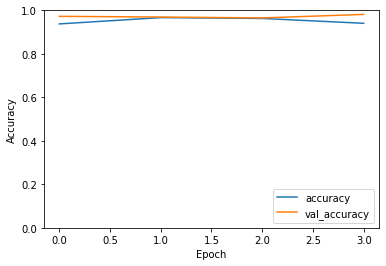

In [25]:
# Training the model for the Mnist digit dataset for the source domain
source_domain= densenet(7,'adam',x_train_prim,y_train_prim,4,x_test_prim,y_test_prim)

In [26]:
# Freezing the last layer of the model and using the prelearnt weight for the target domain
#source_domain.trainable = True # allows all the parameters to be trainable
source_domain.trainable = False # Prevents the parameters of the layers from getting trained again(Freezing parameters)
base_inputs = source_domain.layers[0].input
base_outputs = source_domain.layers[-2].output
target_output = tf.keras.layers.Dense(3)(base_outputs)
target_model = tf.keras.Model(inputs = base_inputs, outputs = target_output)
print(target_model.summary())

Model: "functional_19"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_60 (Conv2D)              (None, 28, 28, 16)   160         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_4 (BatchNor (None, 28, 28, 16)   64          conv2d_60[0][0]                  
__________________________________________________________________________________________________
activation_4 (Activation)       (None, 28, 28, 16)   0           batch_normalization_4[0][0]      
______________________________________________________________________________________

In [ ]:
# The training is done on the source domain model but except the last dense layer. For the purpose of comparision the pretrained 
# model's parameters were trainable. As the result indicates, the accuracy is high and time taken for traininig is 180s on an average for 5 epochs.
target_model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history = target_model.fit(x_train_sec, y_train_sec, epochs=5, validation_data=(x_test_sec, y_test_sec))

Epoch 1/5
565/565 [==============================] - 184s 326ms/step - loss: 1.3331 - accuracy: 0.9257 - val_loss: 0.0848 - val_accuracy: 0.9671
Epoch 2/5
565/565 [==============================] - 182s 321ms/step - loss: 0.0677 - accuracy: 0.9774 - val_loss: 0.0459 - val_accuracy: 0.9847
Epoch 3/5
565/565 [==============================] - 190s 336ms/step - loss: 0.0419 - accuracy: 0.9864 - val_loss: 0.0312 - val_accuracy: 0.9897
Epoch 4/5
565/565 [==============================] - 182s 321ms/step - loss: 0.0299 - accuracy: 0.9906 - val_loss: 0.0344 - val_accuracy: 0.9897
Epoch 5/5
565/565 [==============================] - 187s 331ms/step - loss: 0.0228 - accuracy: 0.9924 - val_loss: 0.0250 - val_accuracy: 0.9910


In [ ]:
# The training is done by keeping the trainable parameters of the source domain as false and only the final dense layer is allowed
# to train. The accuracy is comparable but the training time is reduced to 1/3rd of the original time taken.
target_model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history = target_model.fit(x_train_sec, y_train_sec, epochs=5, validation_data=(x_test_sec, y_test_sec))

Epoch 1/5
565/565 [==============================] - 58s 103ms/step - loss: 2.4101 - accuracy: 0.9257 - val_loss: 0.9602 - val_accuracy: 0.9595
Epoch 2/5
565/565 [==============================] - 58s 103ms/step - loss: 0.8827 - accuracy: 0.9572 - val_loss: 0.9424 - val_accuracy: 0.9538
Epoch 3/5
565/565 [==============================] - 59s 105ms/step - loss: 0.7721 - accuracy: 0.9635 - val_loss: 0.6952 - val_accuracy: 0.9711
Epoch 4/5
565/565 [==============================] - 65s 115ms/step - loss: 0.8475 - accuracy: 0.9654 - val_loss: 0.7688 - val_accuracy: 0.9758
Epoch 5/5
565/565 [==============================] - 58s 103ms/step - loss: 0.7357 - accuracy: 0.9687 - val_loss: 1.7885 - val_accuracy: 0.9166


## Transfer Learning for Fashion Mnist dataset

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 28, 28, 16)   160         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 28, 28, 16)   64          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 28, 28, 16)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

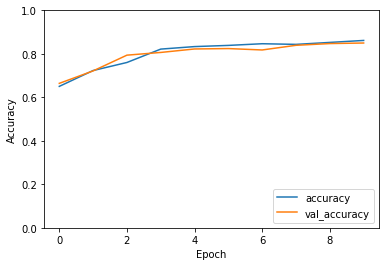

In [4]:
# The second task was to compare the Transfer learning for the Fashion mnist dataset

source_domain_fashion= densenet(7,'adam',x_train_prim_fmnist,y_train_prim_fmnist,10,x_test_prim_fmnist,y_test_prim_fmnist)

In [17]:
#source_domain_fashion.trainable = True # allows all the parameters to be trainable
source_domain_fashion.trainable = False # Prevents the parameters of the layers from getting trained again(Freezing parameters)
base_inputs = source_domain_fashion.layers[0].input
base_outputs = source_domain_fashion.layers[-2].output
target_output = tf.keras.layers.Dense(3)(base_outputs)
target_model_fashion = tf.keras.Model(inputs = base_inputs, outputs = target_output)
print(target_model_fashion.summary())

Model: "functional_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 28, 28, 16)   160         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 28, 28, 16)   64          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 28, 28, 16)   0           batch_normalization[0][0]        
______________________________________________________________________________________

In [9]:
# Performing Transfer learning with limited trainable parameters
target_model_fashion.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history = target_model_fashion.fit(x_train_sec, y_train_sec, epochs=5, validation_data=(x_test_sec, y_test_sec))

Epoch 1/5
563/563 [==============================] - 61s 108ms/step - loss: 0.1012 - accuracy: 0.9663 - val_loss: 0.1156 - val_accuracy: 0.9617
Epoch 2/5
563/563 [==============================] - 56s 100ms/step - loss: 0.0914 - accuracy: 0.9689 - val_loss: 0.1010 - val_accuracy: 0.9677
Epoch 3/5
563/563 [==============================] - 57s 101ms/step - loss: 0.0872 - accuracy: 0.9696 - val_loss: 0.1969 - val_accuracy: 0.9420
Epoch 4/5
563/563 [==============================] - 56s 100ms/step - loss: 0.0811 - accuracy: 0.9718 - val_loss: 0.0889 - val_accuracy: 0.9740
Epoch 5/5
563/563 [==============================] - 64s 114ms/step - loss: 0.0860 - accuracy: 0.9706 - val_loss: 0.1320 - val_accuracy: 0.9647


In [12]:
# training model for 3 classes without limited trainable parameters
target_model_fashion.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history = target_model_fashion.fit(x_train_sec, y_train_sec, epochs=5, validation_data=(x_test_sec, y_test_sec))

Epoch 1/5
563/563 [==============================] - 183s 326ms/step - loss: 0.1333 - accuracy: 0.9583 - val_loss: 0.0681 - val_accuracy: 0.9753
Epoch 2/5
563/563 [==============================] - 190s 338ms/step - loss: 0.0594 - accuracy: 0.9779 - val_loss: 0.0784 - val_accuracy: 0.9743
Epoch 3/5
563/563 [==============================] - 191s 339ms/step - loss: 0.0474 - accuracy: 0.9833 - val_loss: 0.0648 - val_accuracy: 0.9787
Epoch 4/5
563/563 [==============================] - 191s 339ms/step - loss: 0.0415 - accuracy: 0.9844 - val_loss: 0.0605 - val_accuracy: 0.9790
Epoch 5/5
563/563 [==============================] - 191s 339ms/step - loss: 0.0354 - accuracy: 0.9873 - val_loss: 0.0677 - val_accuracy: 0.9793


## Transfer Learning with unfrozen 3rd block of the denseNet

In [34]:
#source_domain_fashion.trainable = True # allows all the parameters to be trainable
source_domain_fashion.trainable = False # Prevents the parameters of the layers from getting trained again(Freezing parameters)
base_inputs = source_domain_fashion.layers[0].input
base_outputs = source_domain_fashion.layers[-12].output

layer1 = tf.keras.layers.Conv2D(24,3,padding='SAME',activation='relu')(base_outputs)
layer2 = tf.keras.layers.concatenate([base_outputs,layer1])
layer3 = tf.keras.layers.Conv2D(24,3,padding='SAME',activation='relu')(layer2)
layer4 = tf.keras.layers.concatenate([layer2,layer3]) 
layer5= tf.keras.layers.Conv2D(24,3,padding='SAME',activation='relu')(layer4)
layer6= tf.keras.layers.concatenate([layer4,layer5])
layer7= tf.keras.layers.Conv2D(24,3,padding='SAME',activation='relu')(layer6)
layer8= tf.keras.layers.concatenate([layer6,layer7])

#classifictaion layer
layer9 = tf.keras.layers.AvgPool2D(2,strides=2)(layer8)
layer10 = tf.keras.layers.Flatten()(layer9)
output = tf.keras.layers.Dense(3,activation='softmax')(layer10)
target_model_fashion = tf.keras.Model(inputs = base_inputs, outputs = output)
print(target_model_fashion.summary())

Model: "functional_21"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 28, 28, 16)   160         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 28, 28, 16)   64          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 28, 28, 16)   0           batch_normalization[0][0]        
______________________________________________________________________________________

In [35]:
target_model_fashion.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history = target_model_fashion.fit(x_train_sec, y_train_sec, epochs=5, validation_data=(x_test_sec, y_test_sec))

Epoch 1/5
565/565 [==============================] - 74s 131ms/step - loss: 0.5536 - accuracy: 0.9982 - val_loss: 0.5514 - val_accuracy: 1.0000
Epoch 2/5
565/565 [==============================] - 65s 116ms/step - loss: 0.5514 - accuracy: 1.0000 - val_loss: 0.5514 - val_accuracy: 1.0000
Epoch 3/5
565/565 [==============================] - 65s 115ms/step - loss: 0.5514 - accuracy: 1.0000 - val_loss: 0.5514 - val_accuracy: 1.0000
Epoch 4/5
565/565 [==============================] - 69s 122ms/step - loss: 0.5514 - accuracy: 1.0000 - val_loss: 0.5514 - val_accuracy: 1.0000
Epoch 5/5
565/565 [==============================] - 65s 116ms/step - loss: 0.5514 - accuracy: 1.0000 - val_loss: 0.5514 - val_accuracy: 1.0000


# Task Summary

| S.no | Model                              | Dataset              | Trainable Parameters | Training Accuracy(%) | Testing Accuracy(%) | Approx Time(sec/Epoch) | Steps untill convergence | Remarks                                                |
|------|------------------------------------|----------------------|----------------------|----------------------|---------------------|------------------------|--------------------------|--------------------------------------------------------|
| 1.a  | Densenet Source                    | Mnist Digit Source   | 52857                | 96.28                | 96.44               | 421                    | 3                        | Training on 7 classes                                  |
| 1.b  | Densenet without Transfer Learning | Mnist Digit Target   | 49361                | 99.24                | 99.10               | 182                    | 4                        | Training on 3 classes without transfer learning        |
| 1.c  | Densenet with Transfer Learning    | Mnist Digit Target   | 2622                 | 96.87                | 91.66               | 58                     | 5                        | Freezing all the layers but final classification layer |
| 2.a  | Densenet Source                    | Fashion Mnist Source | 52857                | 86.17                | 84.99               | 431                    | 10                       | Training on 7 classes                                  |
| 2.b  | Densenet without Transfer Learning | Fashion Mnist Target | 49361                | 98.73                | 97.93               | 185                    | 3                        | Training on 3 target class without transfer learning   |
| 2.c  | Densenet with Transfer Learning    | Fashion Mnist Target | 2622                 | 97.18                | 96.47               | 56                     | 3                        | Freezing all layers but final classification layer     |
| 3.a  | Densenet with layer unfreeze       | Fashion Mnist Target | 34686                | 100.00               | 100.00              | 65                     | 2                        | The last block of the densenet was trained completely  |

* For the completion of the task DenseNet was selected with 3 blocks and 4 layers in each block.

* From the experiments performed, it was observed that with the help of transfer learning(Freezing layers of source model) trainable parameters reduced significantly. This reduced the excution time of the training.

* Learning on Mnist dataset(Digit and Fashion) were equivalently effective and resulted in higher accuracy.

* For the last part, the last block of the denseNet was allowed to train for the target dataset. This resulted in very high accuracy for both training and testing accuracy.
